📊 Ecommerce Orders Analysis - Portfolio Project
🔄 Generating simulated ecommerce data...
✅ Generated 5,000 orders
📅 Date range: 2023-01-01 to 2024-06-29
💰 Total revenue: $873,349.95

📋 Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   order_id          5000 non-null   object        
 1   customer_id       5000 non-null   object        
 2   order_date        5000 non-null   datetime64[ns]
 3   category          5000 non-null   object        
 4   region            5000 non-null   object        
 5   customer_segment  5000 non-null   object        
 6   unit_price        5000 non-null   float64       
 7   quantity          5000 non-null   int64         
 8   total_amount      5000 non-null   float64       
 9   order_month       5000 non-null   period[M]     
 10  order_quarter     5000 non-null   per

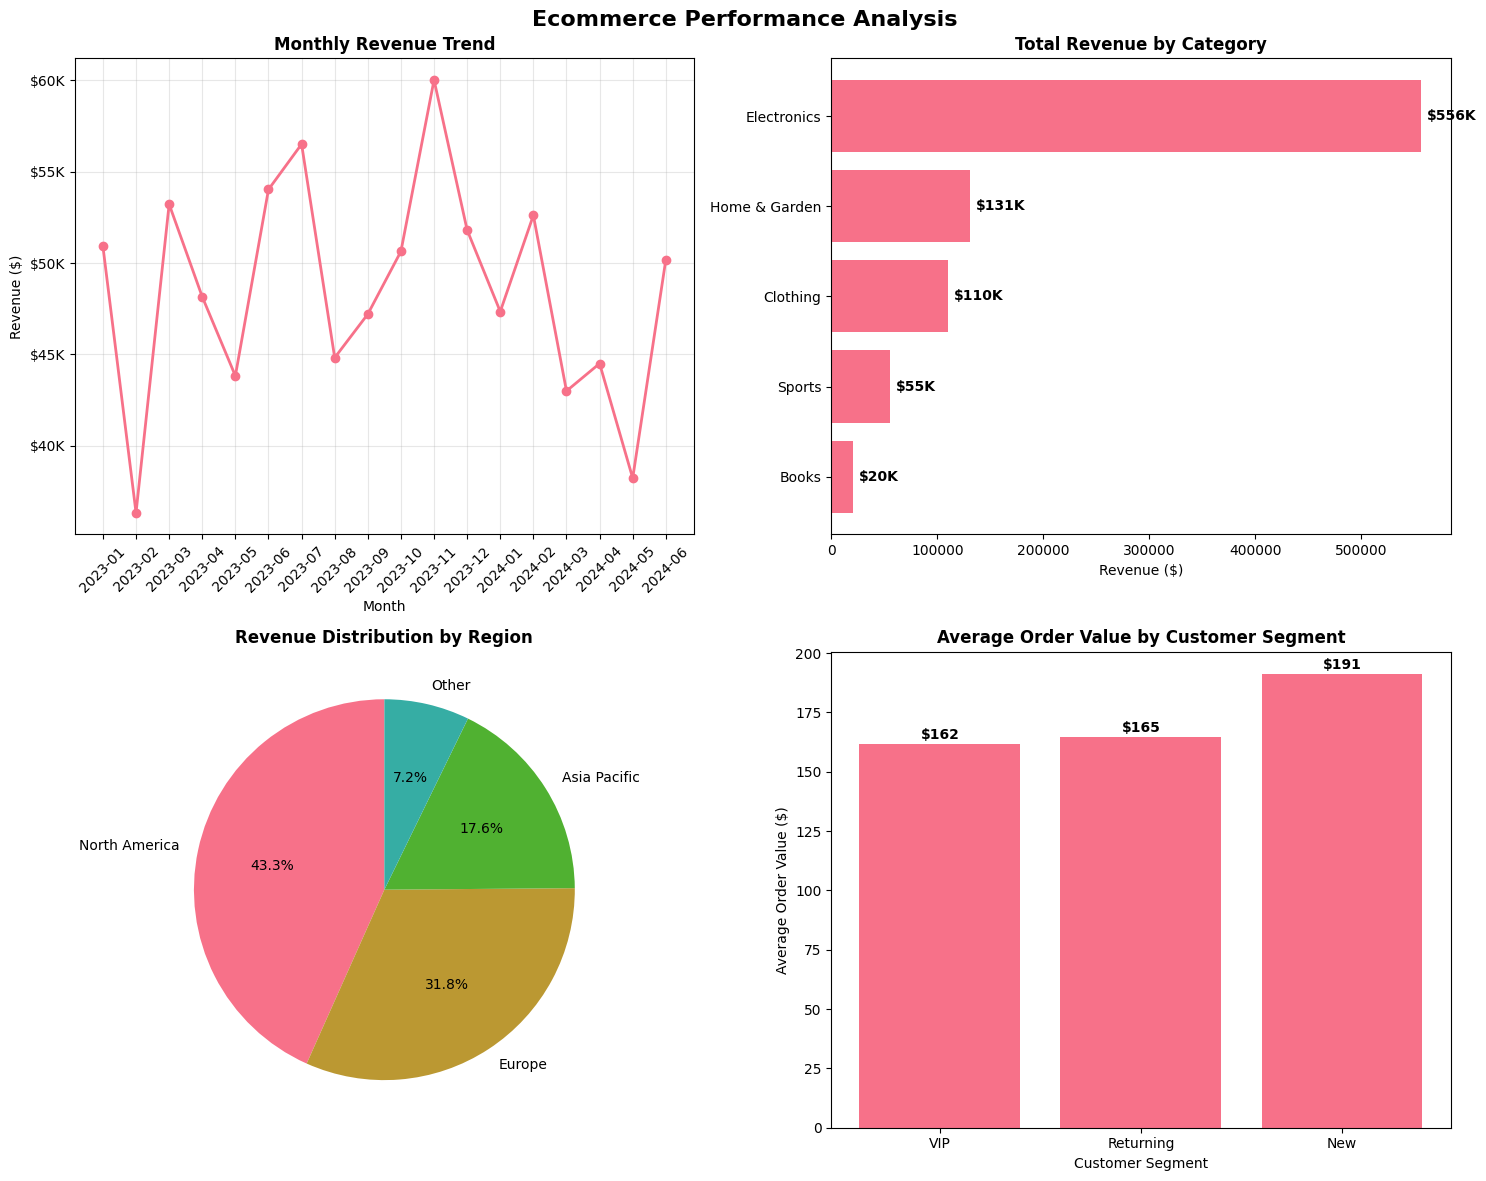


🔍 ADVANCED ANALYTICS

👥 Customer Analysis:
Total unique customers: 3,791
Repeat customers (>1 order): 815
Repeat customer rate: 21.5%

🏆 Top 10 Customers by Total Spent:
             order_count  total_spent  avg_order_value
customer_id                                           
CUST_000507            4      3010.11           752.53
CUST_000414            2      2354.47          1177.23
CUST_001111            2      2354.40          1177.20
CUST_000611            3      2229.27           743.09
CUST_002555            1      2201.85          2201.85
CUST_000401            2      2185.19          1092.60
CUST_000115            2      2178.34          1089.17
CUST_004759            1      2172.73          2172.73
CUST_003715            1      2138.82          2138.82
CUST_000795            1      2102.86          2102.86

📅 Sales by Day of Week:
             order_count    revenue
day_of_week                        
Monday               745  127208.11
Tuesday              693  119276.79


In [1]:
# Ecommerce Orders Analysis - Portfolio Project
# Data simulation and trend analysis for revenue, location, and product performance

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import random
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Set style for better-looking plots
plt.style.use('default')
sns.set_palette("husl")

print("📊 Ecommerce Orders Analysis - Portfolio Project")
print("=" * 50)

# ==========================================
# 1. DATA SIMULATION
# ==========================================

def simulate_ecommerce_data(n_orders=5000, start_date='2023-01-01', end_date='2024-06-30'):
    """
    Simulate realistic ecommerce order data with trends and seasonality

    Parameters:
    - n_orders: Number of orders to generate
    - start_date: Start date for order generation
    - end_date: End date for order generation

    Returns:
    - DataFrame with simulated order data
    """

    np.random.seed(42)  # For reproducible results

    # Date range
    start = pd.to_datetime(start_date)
    end = pd.to_datetime(end_date)

    # Product categories and their base prices
    categories = {
        'Electronics': {'base_price': 299, 'variance': 200, 'popularity': 0.25},
        'Clothing': {'base_price': 49, 'variance': 30, 'popularity': 0.30},
        'Home & Garden': {'base_price': 89, 'variance': 50, 'popularity': 0.20},
        'Books': {'base_price': 19, 'variance': 10, 'popularity': 0.15},
        'Sports': {'base_price': 79, 'variance': 40, 'popularity': 0.10}
    }

    # Geographic regions with different purchasing power
    regions = {
        'North America': {'multiplier': 1.2, 'share': 0.40},
        'Europe': {'multiplier': 1.1, 'share': 0.30},
        'Asia Pacific': {'multiplier': 0.9, 'share': 0.20},
        'Other': {'multiplier': 0.8, 'share': 0.10}
    }

    # Customer segments
    customer_segments = ['New', 'Returning', 'VIP']
    segment_weights = [0.40, 0.45, 0.15]

    orders = []

    for i in range(n_orders):
        # Generate order date with some seasonality (more orders in Nov-Dec)
        days_from_start = (end - start).days
        day_offset = np.random.randint(0, days_from_start)
        order_date = start + timedelta(days=day_offset)

        # Add holiday seasonality boost
        month = order_date.month
        if month in [11, 12]:  # Holiday season
            seasonal_boost = 1.3
        elif month in [6, 7]:  # Summer
            seasonal_boost = 1.1
        else:
            seasonal_boost = 1.0

        # Select category based on popularity
        category = np.random.choice(
            list(categories.keys()),
            p=[categories[cat]['popularity'] for cat in categories.keys()]
        )

        # Select region
        region = np.random.choice(
            list(regions.keys()),
            p=[regions[reg]['share'] for reg in regions.keys()]
        )

        # Select customer segment
        customer_segment = np.random.choice(customer_segments, p=segment_weights)

        # Calculate price with various factors
        base_price = categories[category]['base_price']
        price_variance = categories[category]['variance']
        region_multiplier = regions[region]['multiplier']

        # Customer segment affects price (VIP gets discounts, new customers pay full price)
        if customer_segment == 'VIP':
            segment_multiplier = 0.85  # 15% discount
        elif customer_segment == 'Returning':
            segment_multiplier = 0.95  # 5% discount
        else:
            segment_multiplier = 1.0

        # Final price calculation
        price = base_price + np.random.normal(0, price_variance * 0.3)
        price *= region_multiplier * segment_multiplier * seasonal_boost
        price = max(price, base_price * 0.3)  # Minimum price floor

        # Quantity (most orders are 1 item, some are bulk)
        if np.random.random() < 0.15:  # 15% chance of bulk order
            quantity = np.random.randint(2, 6)
        else:
            quantity = 1

        # Calculate total
        total_amount = price * quantity

        # Generate customer ID (some customers make multiple orders)
        if np.random.random() < 0.3:  # 30% chance of repeat customer
            customer_id = f"CUST_{np.random.randint(1, n_orders//3):06d}"
        else:
            customer_id = f"CUST_{i+1:06d}"

        orders.append({
            'order_id': f"ORD_{i+1:06d}",
            'customer_id': customer_id,
            'order_date': order_date,
            'category': category,
            'region': region,
            'customer_segment': customer_segment,
            'unit_price': round(price, 2),
            'quantity': quantity,
            'total_amount': round(total_amount, 2)
        })

    df = pd.DataFrame(orders)

    # Add some derived columns
    df['order_month'] = df['order_date'].dt.to_period('M')
    df['order_quarter'] = df['order_date'].dt.to_period('Q')
    df['day_of_week'] = df['order_date'].dt.day_name()

    return df

# Generate the dataset
print("🔄 Generating simulated ecommerce data...")
df = simulate_ecommerce_data(n_orders=5000)

print(f"✅ Generated {len(df):,} orders")
print(f"📅 Date range: {df['order_date'].min().date()} to {df['order_date'].max().date()}")
print(f"💰 Total revenue: ${df['total_amount'].sum():,.2f}")

# Display basic info about the dataset
print("\n📋 Dataset Overview:")
print(df.info())

print("\n📊 Sample Data:")
print(df.head())

# ==========================================
# 2. EXPLORATORY DATA ANALYSIS
# ==========================================

print("\n" + "="*50)
print("📈 EXPLORATORY DATA ANALYSIS")
print("="*50)

# Basic statistics
print("\n💹 Revenue Statistics:")
print(f"Mean order value: ${df['total_amount'].mean():.2f}")
print(f"Median order value: ${df['total_amount'].median():.2f}")
print(f"Standard deviation: ${df['total_amount'].std():.2f}")

print("\n🛍️ Category Distribution:")
category_stats = df.groupby('category').agg({
    'order_id': 'count',
    'total_amount': ['sum', 'mean']
}).round(2)
category_stats.columns = ['Order_Count', 'Total_Revenue', 'Avg_Order_Value']
print(category_stats)

print("\n🌍 Regional Performance:")
regional_stats = df.groupby('region').agg({
    'order_id': 'count',
    'total_amount': ['sum', 'mean']
}).round(2)
regional_stats.columns = ['Order_Count', 'Total_Revenue', 'Avg_Order_Value']
print(regional_stats)

# ==========================================
# 3. TIME SERIES ANALYSIS
# ==========================================

print("\n" + "="*50)
print("📅 TIME SERIES ANALYSIS")
print("="*50)

# Monthly revenue trends
monthly_revenue = df.groupby('order_month')['total_amount'].sum().reset_index()
monthly_revenue['order_month_str'] = monthly_revenue['order_month'].astype(str)

print("\n📈 Monthly Revenue Trends:")
print(monthly_revenue.tail(10))

# Create visualizations
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Ecommerce Performance Analysis', fontsize=16, fontweight='bold')

# 1. Monthly Revenue Trend
axes[0, 0].plot(monthly_revenue['order_month_str'], monthly_revenue['total_amount'],
                marker='o', linewidth=2, markersize=6)
axes[0, 0].set_title('Monthly Revenue Trend', fontweight='bold')
axes[0, 0].set_xlabel('Month')
axes[0, 0].set_ylabel('Revenue ($)')
axes[0, 0].tick_params(axis='x', rotation=45)
axes[0, 0].grid(True, alpha=0.3)

# Format y-axis to show values in thousands
axes[0, 0].yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x/1000:.0f}K'))

# 2. Revenue by Category
category_revenue = df.groupby('category')['total_amount'].sum().sort_values(ascending=True)
axes[0, 1].barh(category_revenue.index, category_revenue.values)
axes[0, 1].set_title('Total Revenue by Category', fontweight='bold')
axes[0, 1].set_xlabel('Revenue ($)')
for i, v in enumerate(category_revenue.values):
    axes[0, 1].text(v + max(category_revenue.values) * 0.01, i, f'${v/1000:.0f}K',
                    va='center', fontweight='bold')

# 3. Revenue by Region
region_revenue = df.groupby('region')['total_amount'].sum().sort_values(ascending=False)
axes[1, 0].pie(region_revenue.values, labels=region_revenue.index, autopct='%1.1f%%',
               startangle=90)
axes[1, 0].set_title('Revenue Distribution by Region', fontweight='bold')

# 4. Average Order Value by Customer Segment
segment_aov = df.groupby('customer_segment')['total_amount'].mean().sort_values(ascending=True)
bars = axes[1, 1].bar(segment_aov.index, segment_aov.values)
axes[1, 1].set_title('Average Order Value by Customer Segment', fontweight='bold')
axes[1, 1].set_ylabel('Average Order Value ($)')
axes[1, 1].set_xlabel('Customer Segment')

# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    axes[1, 1].text(bar.get_x() + bar.get_width()/2., height + 1,
                    f'${height:.0f}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

# ==========================================
# 4. ADVANCED ANALYTICS
# ==========================================

print("\n" + "="*50)
print("🔍 ADVANCED ANALYTICS")
print("="*50)

# Customer analysis
print("\n👥 Customer Analysis:")
customer_metrics = df.groupby('customer_id').agg({
    'order_id': 'count',
    'total_amount': 'sum'
}).rename(columns={'order_id': 'order_count', 'total_amount': 'total_spent'})

customer_metrics['avg_order_value'] = customer_metrics['total_spent'] / customer_metrics['order_count']

print(f"Total unique customers: {len(customer_metrics):,}")
print(f"Repeat customers (>1 order): {len(customer_metrics[customer_metrics['order_count'] > 1]):,}")
print(f"Repeat customer rate: {len(customer_metrics[customer_metrics['order_count'] > 1]) / len(customer_metrics) * 100:.1f}%")

# Top customers
print("\n🏆 Top 10 Customers by Total Spent:")
top_customers = customer_metrics.nlargest(10, 'total_spent')
print(top_customers.round(2))

# Day of week analysis
print("\n📅 Sales by Day of Week:")
dow_analysis = df.groupby('day_of_week').agg({
    'order_id': 'count',
    'total_amount': 'sum'
}).rename(columns={'order_id': 'order_count', 'total_amount': 'revenue'})

# Reorder days
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
dow_analysis = dow_analysis.reindex(day_order)
print(dow_analysis.round(2))

# Statistical tests
print("\n📊 Statistical Analysis:")

# Test if revenue differs significantly between regions
region_groups = [group['total_amount'].values for name, group in df.groupby('region')]
f_stat, p_value = stats.f_oneway(*region_groups)
print(f"ANOVA test for regional revenue differences:")
print(f"F-statistic: {f_stat:.3f}, p-value: {p_value:.3f}")

if p_value < 0.05:
    print("✅ Significant differences found between regions")
else:
    print("❌ No significant differences found between regions")

# ==========================================
# 5. KEY INSIGHTS & RECOMMENDATIONS
# ==========================================

print("\n" + "="*50)
print("💡 KEY INSIGHTS & RECOMMENDATIONS")
print("="*50)

# Calculate some key metrics for insights
total_revenue = df['total_amount'].sum()
total_orders = len(df)
avg_order_value = total_revenue / total_orders

# Best performing category
best_category = df.groupby('category')['total_amount'].sum().idxmax()
best_category_revenue = df.groupby('category')['total_amount'].sum().max()

# Best performing region
best_region = df.groupby('region')['total_amount'].sum().idxmax()
best_region_revenue = df.groupby('region')['total_amount'].sum().max()

# Peak month
peak_month = monthly_revenue.loc[monthly_revenue['total_amount'].idxmax(), 'order_month']
peak_month_revenue = monthly_revenue['total_amount'].max()

print(f"""
🎯 BUSINESS INSIGHTS:

1. REVENUE PERFORMANCE
   • Total Revenue: ${total_revenue:,.2f}
   • Total Orders: {total_orders:,}
   • Average Order Value: ${avg_order_value:.2f}

2. TOP PERFORMERS
   • Best Category: {best_category} (${best_category_revenue:,.2f})
   • Best Region: {best_region} (${best_region_revenue:,.2f})
   • Peak Month: {peak_month} (${peak_month_revenue:,.2f})

3. CUSTOMER BEHAVIOR
   • Repeat Customer Rate: {len(customer_metrics[customer_metrics['order_count'] > 1]) / len(customer_metrics) * 100:.1f}%
   • VIP Segment AOV: ${segment_aov['VIP']:.2f}
   • New Customer AOV: ${segment_aov['New']:.2f}

📈 RECOMMENDATIONS:

1. GEOGRAPHIC EXPANSION
   • Focus marketing efforts on {best_region} region
   • Investigate growth opportunities in underperforming regions

2. CATEGORY OPTIMIZATION
   • Expand {best_category} product lines
   • Improve marketing for lower-performing categories

3. CUSTOMER RETENTION
   • Implement loyalty programs to increase repeat purchase rate
   • Create VIP customer experiences to maintain high-value segments

4. SEASONAL STRATEGY
   • Prepare inventory and marketing for peak seasons
   • Develop off-season promotional strategies
""")

print("\n✅ Analysis Complete!")
print("📁 Ready to save notebook and upload to GitHub")